In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("../data/2014-present-miami.csv", header=2)
df.head()

,time,temperature_2m_max (°C),temperature_2m_min (°C),temperature_2m_mean (°C),sunrise (iso8601),sunset (iso8601),precipitation_sum (mm),wind_speed_10m_max (km/h)
0,2014-01-01,26.0,23.0,24.1,2014-01-01T07:07,2014-01-01T17:41,1.0,24.2
1,2014-01-02,27.0,22.4,24.6,2014-01-02T07:07,2014-01-02T17:42,0.0,21.9
2,2014-01-03,22.4,16.9,19.0,2014-01-03T07:08,2014-01-03T17:42,0.2,32.0
3,2014-01-04,23.5,19.1,21.6,2014-01-04T07:08,2014-01-04T17:43,0.8,21.5
4,2014-01-05,25.8,22.8,24.0,2014-01-05T07:08,2014-01-05T17:44,1.2,26.6


In [3]:
df.set_index("time")

,temperature_2m_max (°C),temperature_2m_min (°C),temperature_2m_mean (°C),sunrise (iso8601),sunset (iso8601),precipitation_sum (mm),wind_speed_10m_max (km/h)
time,,,,,,,
2014-01-01,26.0,23.0,24.1,2014-01-01T07:07,2014-01-01T17:41,1.0,24.2
2014-01-02,27.0,22.4,24.6,2014-01-02T07:07,2014-01-02T17:42,0.0,21.9
2014-01-03,22.4,16.9,19.0,2014-01-03T07:08,2014-01-03T17:42,0.2,32.0
2014-01-04,23.5,19.1,21.6,2014-01-04T07:08,2014-01-04T17:43,0.8,21.5
2014-01-05,25.8,22.8,24.0,2014-01-05T07:08,2014-01-05T17:44,1.2,26.6
...,...,...,...,...,...,...,...
2023-11-20,26.9,19.3,23.7,2023-11-20T06:42,2023-11-20T17:30,0.4,21.0
2023-11-21,26.2,23.6,24.7,2023-11-21T06:43,2023-11-21T17:30,0.0,25.4
2023-11-22,27.3,22.1,24.8,2023-11-22T06:43,2023-11-22T17:30,0.0,18.0


In [4]:
df.isna().sum()

time                         0
temperature_2m_max (°C)      0
temperature_2m_min (°C)      0
temperature_2m_mean (°C)     0
sunrise (iso8601)            0
sunset (iso8601)             0
precipitation_sum (mm)       0
wind_speed_10m_max (km/h)    0
dtype: int64

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3615 entries, 0 to 3614
Data columns (total 8 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   time                       3615 non-null   object 
 1   temperature_2m_max (°C)    3615 non-null   float64
 2   temperature_2m_min (°C)    3615 non-null   float64
 3   temperature_2m_mean (°C)   3615 non-null   float64
 4   sunrise (iso8601)          3615 non-null   object 
 5   sunset (iso8601)           3615 non-null   object 
 6   precipitation_sum (mm)     3615 non-null   float64
 7   wind_speed_10m_max (km/h)  3615 non-null   float64
dtypes: float64(5), object(3)
memory usage: 226.1+ KB


In [6]:
timeindex = pd.to_datetime(df['time'])

In [7]:
sunriseindex = pd.to_datetime(df['sunrise (iso8601)'])
sunriseindex

0      2014-01-01 07:07:00
1      2014-01-02 07:07:00
2      2014-01-03 07:08:00
3      2014-01-04 07:08:00
4      2014-01-05 07:08:00
               ...        
3610   2023-11-20 06:42:00
3611   2023-11-21 06:43:00
3612   2023-11-22 06:43:00
3613   2023-11-23 06:44:00
3614   2023-11-24 06:45:00
Name: sunrise (iso8601), Length: 3615, dtype: datetime64[ns]

In [8]:
df['time'] = pd.to_datetime(df['time'])
df['sunrise (iso8601)'] = pd.to_datetime(df['sunrise (iso8601)'])
df['sunset (iso8601)'] = pd.to_datetime(df['sunset (iso8601)'])

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3615 entries, 0 to 3614
Data columns (total 8 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   time                       3615 non-null   datetime64[ns]
 1   temperature_2m_max (°C)    3615 non-null   float64       
 2   temperature_2m_min (°C)    3615 non-null   float64       
 3   temperature_2m_mean (°C)   3615 non-null   float64       
 4   sunrise (iso8601)          3615 non-null   datetime64[ns]
 5   sunset (iso8601)           3615 non-null   datetime64[ns]
 6   precipitation_sum (mm)     3615 non-null   float64       
 7   wind_speed_10m_max (km/h)  3615 non-null   float64       
dtypes: datetime64[ns](3), float64(5)
memory usage: 226.1 KB


In [10]:
df.head()

,time,temperature_2m_max (°C),temperature_2m_min (°C),temperature_2m_mean (°C),sunrise (iso8601),sunset (iso8601),precipitation_sum (mm),wind_speed_10m_max (km/h)
0,2014-01-01,26.0,23.0,24.1,2014-01-01 07:07:00,2014-01-01 17:41:00,1.0,24.2
1,2014-01-02,27.0,22.4,24.6,2014-01-02 07:07:00,2014-01-02 17:42:00,0.0,21.9
2,2014-01-03,22.4,16.9,19.0,2014-01-03 07:08:00,2014-01-03 17:42:00,0.2,32.0
3,2014-01-04,23.5,19.1,21.6,2014-01-04 07:08:00,2014-01-04 17:43:00,0.8,21.5
4,2014-01-05,25.8,22.8,24.0,2014-01-05 07:08:00,2014-01-05 17:44:00,1.2,26.6


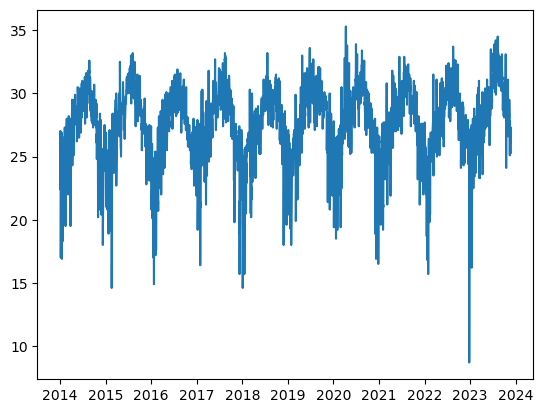

In [11]:
plt.plot(df['sunrise (iso8601)'], df['temperature_2m_max (°C)'])